In [113]:
# import libraries

import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# notebook settings 

pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', None)
settings :  { "notebook.output.textLineLimit": 9999 }

In [35]:
df = pd.read_csv('pre-processed_new.csv')

df.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,Winner,title_bout,weight_class,gender,no_of_rounds,B_Stance,R_Stance,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,finish,finish_round,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds,weight_diff,win_by_decision_diff
0,Eric Schafer,Jason Brilz,140.0,-160,140.000000,62.500000,2010-03-21,Blue,False,Light Heavyweight,MALE,3,Orthodox,Orthodox,0,0,0,-1,2,-1,0,0,-2,-10.16,-10.16,-2,16.000000,-0.666667,0.833333,1,NaN,NaN,U-DEC,3.0,NaN,NaN,NaN,NaN,NaN,NaN,-20,-1
1,Brandon Vera,Jon Jones,215.0,-235,215.000000,42.553191,2010-03-21,Blue,False,Light Heavyweight,MALE,3,Orthodox,Orthodox,0,0,-1,-4,3,-14,0,-4,0,2.54,20.32,10,8.272727,0.159091,1.954545,1,NaN,NaN,KO/TKO,1.0,NaN,NaN,NaN,NaN,NaN,NaN,25,0
2,Junior Dos Santos,Gabriel Gonzaga,-250.0,230,40.000000,230.000000,2010-03-21,Red,False,Heavyweight,MALE,3,Orthodox,Orthodox,0,-3,0,3,-3,10,1,1,2,-5.08,-2.54,-4,-12.050000,0.700000,1.200000,1,NaN,NaN,KO/TKO,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-4,0
3,Alessio Sakara,James Irvin,-120.0,100,83.333333,100.000000,2010-03-21,Red,False,Middleweight,MALE,3,Orthodox,Orthodox,-1,-2,0,-1,1,-5,0,0,0,5.08,7.62,-3,-15.550000,0.125000,-1.000000,1,NaN,NaN,KO/TKO,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-20,2
4,Mike Pierce,Julio Paulino,-420.0,335,23.809524,335.000000,2010-03-21,Red,False,Welterweight,MALE,3,Orthodox,Orthodox,1,0,-1,-1,1,-6,0,0,0,10.16,7.62,-5,-40.500000,0.000000,-3.500000,1,NaN,NaN,U-DEC,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1


In [48]:
df['date'] =pd.to_datetime(df['date'])


In [32]:
# fillna match_weightclass_rank

# for null values >2013 null values will be replaced with rank 16 as they are most likely brand new fighters with no weight class ranking
# for null values before they either need to be dropped or included in the model as they are true nulls since there is not data on them
# for models that can handle nulls I'll include the columns with some data cleaning, but for models that don't have nulls ill drop




In [36]:
df.drop(['R_fighter','B_fighter'],axis=1,inplace=True)

# EDA 

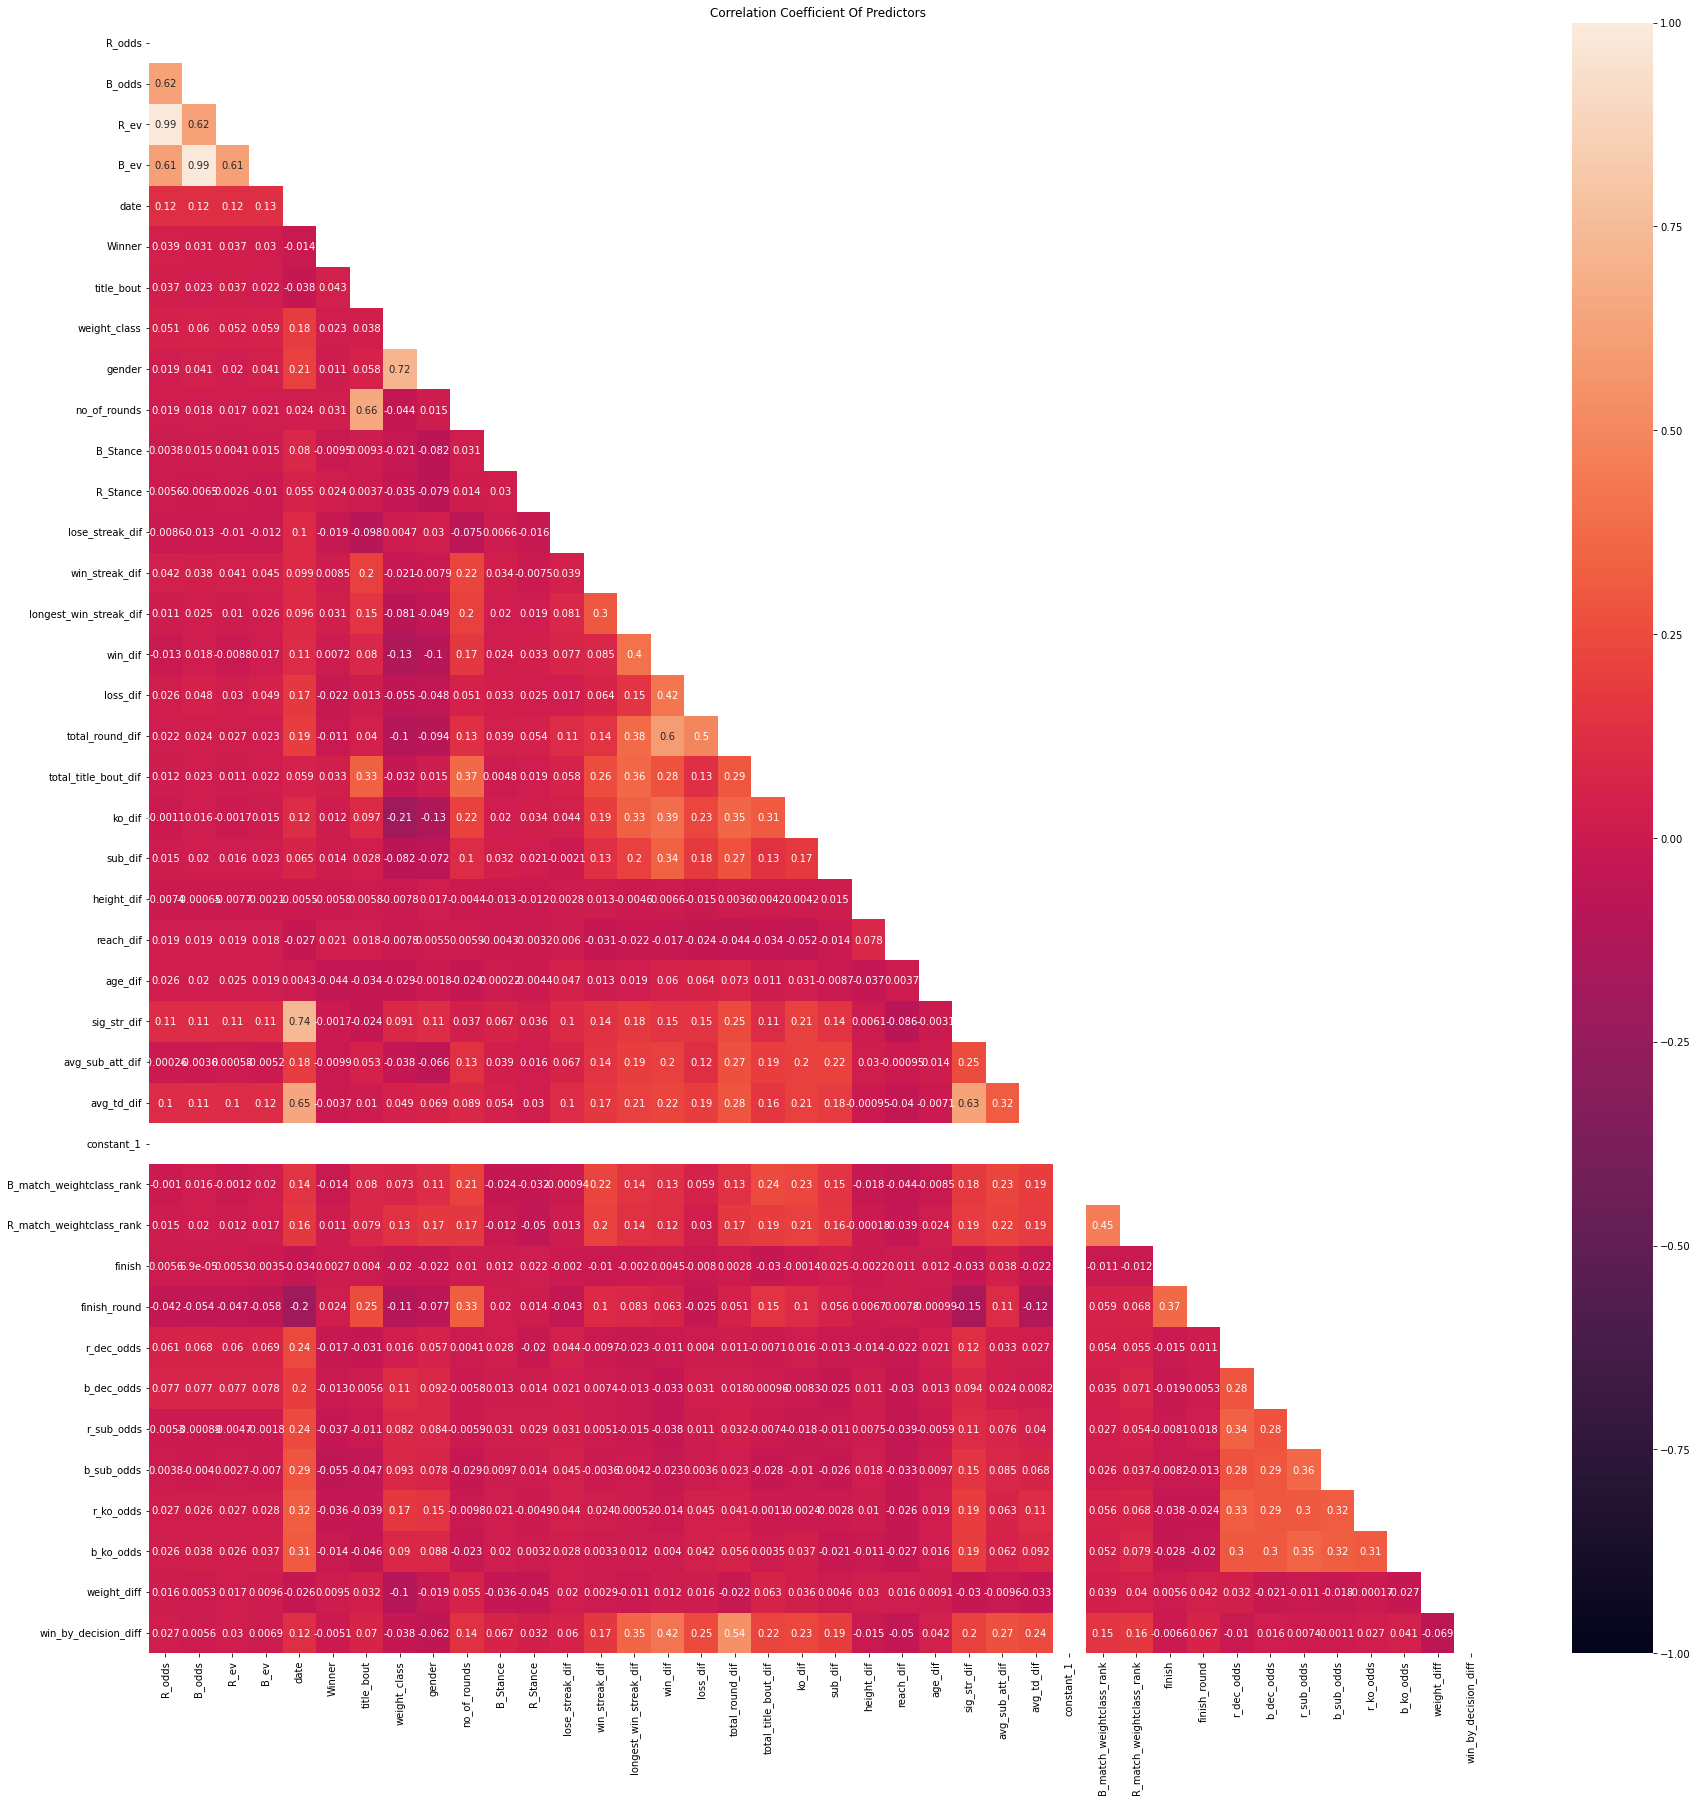

In [124]:
# correlation

# set figure size
plt.figure(figsize=(30,30))

# generate correlation
# use .factorize() to turn categorical variables into numeric in order to properly perform it

correlation = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)


# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))

# generate heatmap
sns.heatmap(correlation, annot=True, mask=mask, vmin=-1, vmax=1)

#sns.heatmap(correlation, annot=True, vmin=-1, vmax=1) # without mask it shows the whole thing

plt.title('Correlation Coefficient Of Predictors')
plt.show()


# Baseline

In [49]:
b_df=df.copy()

In [50]:
df.isnull().sum()

R_odds                         0
B_odds                         0
R_ev                           0
B_ev                           0
date                           0
Winner                         0
title_bout                     0
weight_class                   0
gender                         0
no_of_rounds                   0
B_Stance                       0
R_Stance                       0
lose_streak_dif                0
win_streak_dif                 0
longest_win_streak_dif         0
win_dif                        0
loss_dif                       0
total_round_dif                0
total_title_bout_dif           0
ko_dif                         0
sub_dif                        0
height_dif                     0
reach_dif                      0
age_dif                        0
sig_str_dif                    0
avg_sub_att_dif                0
avg_td_dif                     0
constant_1                     0
B_match_weightclass_rank    3746
R_match_weightclass_rank    3335
finish    

In [52]:
b_df.dropna(subset=['R_odds','R_ev','B_Stance'],axis=0,inplace=True)

In [53]:
b_df.drop(['B_match_weightclass_rank','R_match_weightclass_rank'],axis=1,inplace=True)

In [79]:
b_df=pd.get_dummies(b_df, drop_first=True)

In [95]:
b_df.isnull().sum()

R_odds                                  0
B_odds                                  0
R_ev                                    0
B_ev                                    0
date                                    0
title_bout                              0
lose_streak_dif                         0
win_streak_dif                          0
longest_win_streak_dif                  0
win_dif                                 0
loss_dif                                0
total_round_dif                         0
total_title_bout_dif                    0
ko_dif                                  0
sub_dif                                 0
height_dif                              0
reach_dif                               0
age_dif                                 0
sig_str_dif                             0
avg_sub_att_dif                         0
avg_td_dif                              0
constant_1                              0
finish_round                          610
r_dec_odds                        

In [64]:
b_df[['date','Winner']].groupby('date').count().sort_index(ascending=False).head()

,Winner
date,
2021-10-02,11
2021-09-25,13
2021-09-18,12
2021-09-04,9
2021-08-28,12


In [73]:
b_df[['date','Winner']].groupby('date').count().size

428

In [93]:
# train test split
# these are date sensitive so I am using the 4 most recent events

test = b_df[(b_df['date'] == '2021-10-02')
    | (b_df['date'] == '2021-09-25')	
    | (b_df['date'] == '2021-09-18')	
    | (b_df['date'] == '2021-09-04')
    ]

train = b_df[(b_df['date'] != '2021-10-02')
    & (b_df['date'] != '2021-09-25')	
    & (b_df['date'] != '2021-09-18')	
    & (b_df['date'] != '2021-09-04')
    ]

In [91]:
b_df[['no_of_rounds','date']].groupby('no_of_rounds').count()

,date
no_of_rounds,
3,4129
4,21
5,386


In [111]:
target_test = test[['finish_round','Winner_Red','finish_M-DEC','finish_S-DEC','finish_SUB','finish_U-DEC']]

target_train = train[['finish_round','Winner_Red','finish_M-DEC','finish_S-DEC','finish_SUB','finish_U-DEC']]

In [108]:
# predictor with odds

f_predictor_test = test.drop(['finish_round','Winner_Red','finish_M-DEC','finish_S-DEC','finish_SUB','finish_U-DEC'], axis=1, inplace=False)

f_predictor_train = train.drop(['finish_round','Winner_Red','finish_M-DEC','finish_S-DEC','finish_SUB','finish_U-DEC'], axis=1, inplace=False)

# predictor with no odds

n_predictor_test = test[['date', 'title_bout',
       'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif',
       'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif',
       'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif',
       'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif', 'constant_1',
       'finish_round', 
       'weight_diff', 'win_by_decision_diff',
       'weight_class_Catch Weight', 'weight_class_Featherweight',
       'weight_class_Flyweight', 'weight_class_Heavyweight',
       'weight_class_Light Heavyweight', 'weight_class_Lightweight',
       'weight_class_Middleweight', 'weight_class_Welterweight',
       'weight_class_Women\'s Bantamweight',
       'weight_class_Women\'s Featherweight', 'weight_class_Women\'s Flyweight',
       'weight_class_Women\'s Strawweight', 'gender_MALE', 'B_Stance_Southpaw',
       'B_Stance_Switch', 'B_Stance_Switch ', 'R_Stance_Orthodox',
       'R_Stance_Southpaw']]

n_predictor_train = train[['date', 'title_bout',
       'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif',
       'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif',
       'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif',
       'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif', 'constant_1',
       'finish_round', 
       'weight_diff', 'win_by_decision_diff',
       'weight_class_Catch Weight', 'weight_class_Featherweight',
       'weight_class_Flyweight', 'weight_class_Heavyweight',
       'weight_class_Light Heavyweight', 'weight_class_Lightweight',
       'weight_class_Middleweight', 'weight_class_Welterweight',
       'weight_class_Women\'s Bantamweight',
       'weight_class_Women\'s Featherweight', 'weight_class_Women\'s Flyweight',
       'weight_class_Women\'s Strawweight', 'gender_MALE', 'B_Stance_Southpaw',
       'B_Stance_Switch', 'B_Stance_Switch ', 'R_Stance_Orthodox',
       'R_Stance_Southpaw']]

## Model

# Random stuff

In [101]:
train.columns

Index(['R_odds', 'B_odds', 'R_ev', 'B_ev', 'date', 'title_bout',
       'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif',
       'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif',
       'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif',
       'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif', 'constant_1',
       'finish_round', 'r_dec_odds', 'b_dec_odds', 'r_sub_odds', 'b_sub_odds',
       'r_ko_odds', 'b_ko_odds', 'weight_diff', 'win_by_decision_diff',
       'Winner_Red', 'weight_class_Catch Weight', 'weight_class_Featherweight',
       'weight_class_Flyweight', 'weight_class_Heavyweight',
       'weight_class_Light Heavyweight', 'weight_class_Lightweight',
       'weight_class_Middleweight', 'weight_class_Welterweight',
       'weight_class_Women's Bantamweight',
       'weight_class_Women's Featherweight', 'weight_class_Women's Flyweight',
       'weight_class_Women's Strawweight', 'gender_MALE', 'B_Stance_Southpaw',
       'B_Stance_Switch', 'B_

In [ ]:
# odds 

'R_odds', 'B_odds', 'R_ev', 'B_ev','r_dec_odds', 'b_dec_odds', 'r_sub_odds', 'b_sub_odds',

In [105]:
# should maybe drop this

b_df[['total_title_bout_dif']].describe()

,total_title_bout_dif
count,4536.000000
mean,-0.274471
std,1.492597
min,-14.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,14.000000


In [106]:
# shouldn't drop this one as there is a mena and all 


b_df[['total_round_dif']].describe()

,total_round_dif
count,4536.000000
mean,-5.089286
std,16.444507
min,-448.000000
25%,-11.000000
50%,-3.000000
75%,2.000000
max,80.000000
